In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_dataset = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
loan_dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
# number of rowas and columns
loan_dataset.shape

(614, 13)

In [5]:
# statistical measures 
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# drop all the missing values bcz some are string values 
loan_dataset = loan_dataset.dropna()

In [8]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# label encoding 
# we have label encoding and Y and N so we can replace the 1 with Y and 0 with N
loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}},inplace=True)
loan_dataset.replace({'Married':{'No':0, 'Yes':1},'Gender':{'Female':0, 'Male':1}, 'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Not Graduate':0,'Graduate':1}},inplace=True)

In [10]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [11]:
# Dependents column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
# we can not feed the 3+ value to our model so replace it with 4
loan_dataset= loan_dataset.replace(to_replace='3+', value=4)

In [13]:
#Dependents values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### data Viscualization to find the relationship of various coumn of data 

<AxesSubplot:xlabel='Education', ylabel='count'>

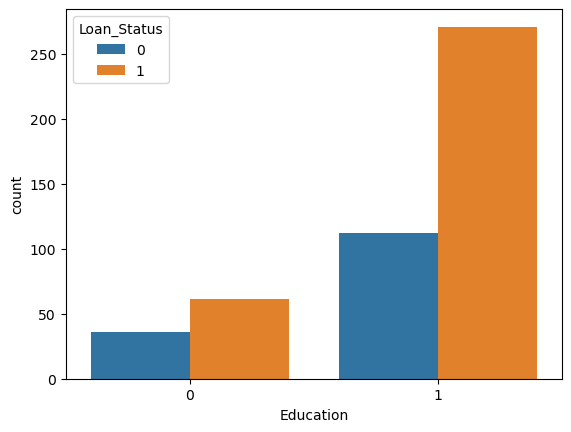

In [14]:
# education & loan status
sns.countplot(x='Education',hue ='Loan_Status',data = loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

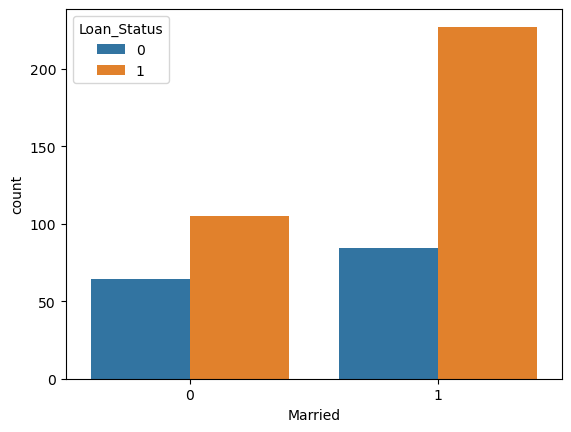

In [15]:
# marital status & loan status
sns.countplot(x='Married',hue ='Loan_Status',data = loan_dataset)

In [16]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [17]:
# separating the data and label (we don't need loan_id)
x = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)  
y = loan_dataset['Loan_Status']

In [18]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [19]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


### Spliting traning and test data 

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)  # 0.1 means 10% in test data and 90% in train 

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (432, 11) (48, 11)


In [22]:
print(y.shape,y_train.shape,y_test.shape)

(480,) (432,) (48,)


### traning the model : support vector machine

In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
#traning the support vector machine model
classifier.fit(x_train,y_train)

SVC(kernel='linear')

### model Evaluation

In [25]:
# accuracy score on traning data

In [26]:
x_train_prediciton = classifier.predict(x_train)
traning_data_accuracy = accuracy_score(x_train_prediciton,y_train)

In [27]:
print('accuracy on traning data:',traning_data_accuracy) 

accuracy on traning data: 0.7986111111111112


In [28]:
x_test_prediciton = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediciton,y_test)

In [29]:
print('accuracy on traning data:',test_data_accuracy) 

accuracy on traning data: 0.8333333333333334


### making predictive system

In [30]:
input_data = (1.0,0.0,0.0,1.0,0.0,12841.0,10968.0,349.0,360.0,0.0,1.0)

#changing the input_data type list to numpy array 
input_data_as_numpy_array = np.array(input_data)

#reshape the np as we are predicting for one instance 
input_data_reshape= input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshape)

print(prediction)

if(prediction[0]== 1):
    print('Loan_Approve')
else:
    print('Loan_NOT_Approve')

[0]
Loan_NOT_Approve
